# Random Signal Analysis - Variant 14

**Task:** Generate an ergodic signal and a non-ergodic signal. Compare running means and ensemble means. Show how PSD estimation differs when using a single realization versus multiple ones.


## Import Libraries and Setup

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, periodogram
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)  # For reproducibility

# Parameters
N = 10000  # Signal length
fs = 1000  # Sampling frequency
num_realizations = 50  # Number of ensemble realizations

print("=" * 60)
print("RANDOM SIGNAL ANALYSIS - VARIANT 14")
print("=" * 60)
print("Task: Ergodic vs Non-ergodic signal analysis")
print(f"Signal length: {N} samples")
print(f"Sampling frequency: {fs} Hz")
print(f"Number of ensemble realizations: {num_realizations}")
print("=" * 60)

RANDOM SIGNAL ANALYSIS - VARIANT 14
Task: Ergodic vs Non-ergodic signal analysis
Signal length: 10000 samples
Sampling frequency: 1000 Hz
Number of ensemble realizations: 50


## Part 1: Generate Ergodic Signal (White Gaussian Noise)

An ergodic signal has the property that time averages equal ensemble averages. White Gaussian Noise is a classic example of an ergodic process.

In [24]:
print("\nPART 1: ERGODIC SIGNAL GENERATION")
print("-" * 40)

# Generate multiple realizations of ergodic signal (White Gaussian Noise)
ergodic_realizations = []
for i in range(num_realizations):
    signal = np.random.normal(0, 1, N)
    ergodic_realizations.append(signal)

ergodic_realizations = np.array(ergodic_realizations)
print(f"Generated {num_realizations} realizations of ergodic signal (WGN)")
print(f"Theoretical mean: 0.0, Theoretical variance: 1.0")


PART 1: ERGODIC SIGNAL GENERATION
----------------------------------------
Generated 50 realizations of ergodic signal (WGN)
Theoretical mean: 0.0, Theoretical variance: 1.0


## Part 2: Generate Non-Ergodic Signal

A non-ergodic signal violates the ergodicity condition. We create this by adding different random DC offsets to each realization, making time averages different from ensemble averages.

In [25]:
print("\nPART 2: NON-ERGODIC SIGNAL GENERATION")
print("-" * 40)

# Generate non-ergodic signal: Each realization has different random DC offset
non_ergodic_realizations = []
dc_offsets = np.random.uniform(-3, 3, num_realizations)  # Random DC offsets

for i in range(num_realizations):
    # White noise + random DC offset for each realization
    signal = np.random.normal(0, 1, N) + dc_offsets[i]
    non_ergodic_realizations.append(signal)

non_ergodic_realizations = np.array(non_ergodic_realizations)
print(f"Generated {num_realizations} realizations of non-ergodic signal")
print(f"Each realization has different DC offset: {dc_offsets[:5]}... (showing first 5)")


PART 2: NON-ERGODIC SIGNAL GENERATION
----------------------------------------
Generated 50 realizations of non-ergodic signal
Each realization has different DC offset: [-1.16775083 -1.51337429  1.33342935  2.18004461 -2.04138916]... (showing first 5)


## Part 3: Running Mean Analysis

Running means show how the time average evolves as we process more samples. For ergodic signals, these should converge to the true mean.


PART 3: RUNNING MEAN ANALYSIS
----------------------------------------


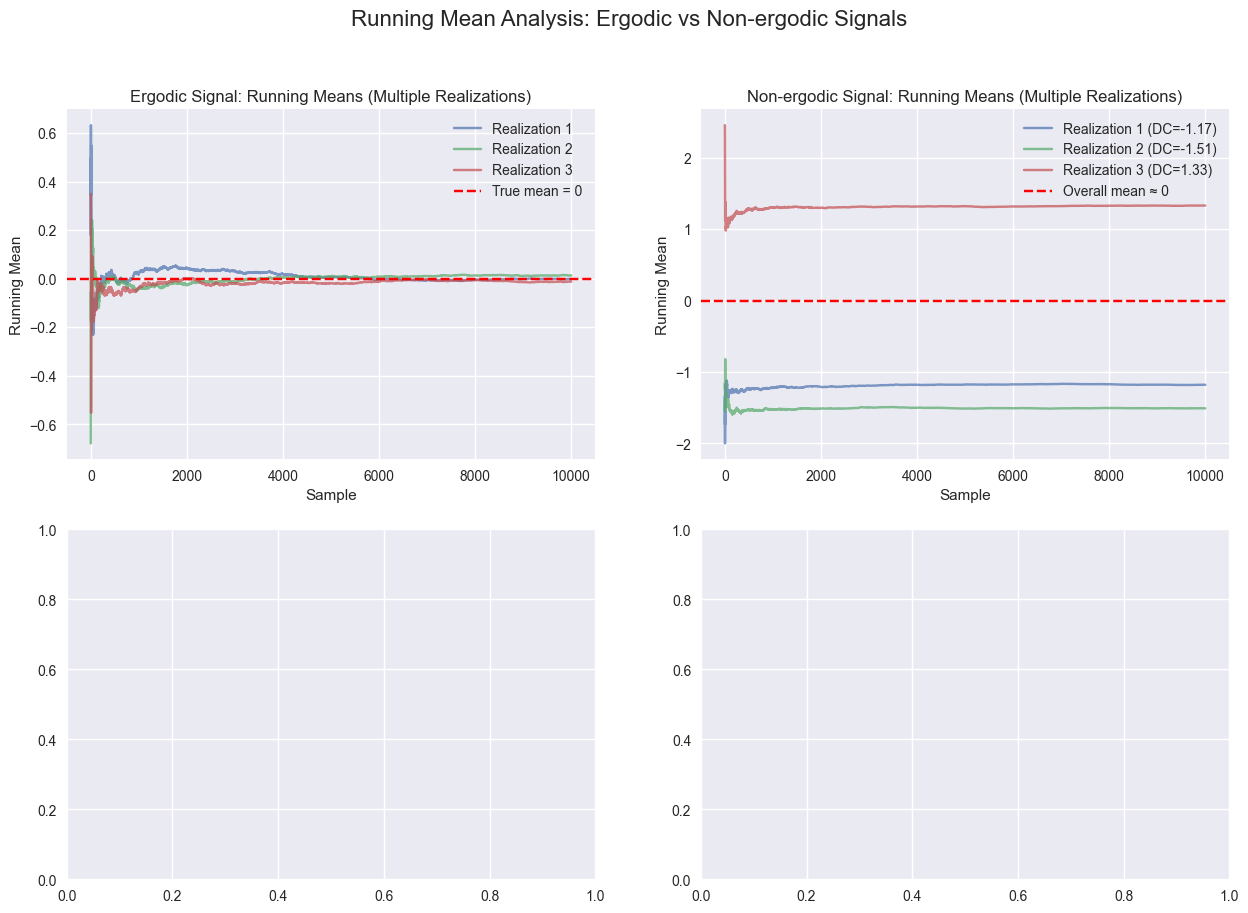

In [26]:
print("\nPART 3: RUNNING MEAN ANALYSIS")
print("-" * 40)

def calculate_running_mean(signal):
    """Calculate running mean of a signal"""
    return np.cumsum(signal) / np.arange(1, len(signal) + 1)

# Calculate running means for ergodic signal (use first 3 realizations for plotting)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Running Mean Analysis: Ergodic vs Non-ergodic Signals', fontsize=16)

# Ergodic signal running means
axes[0, 0].set_title('Ergodic Signal: Running Means (Multiple Realizations)')
for i in range(3):
    running_mean = calculate_running_mean(ergodic_realizations[i])
    axes[0, 0].plot(running_mean, alpha=0.7, label=f'Realization {i+1}')
axes[0, 0].axhline(y=0, color='red', linestyle='--', label='True mean = 0')
axes[0, 0].set_xlabel('Sample')
axes[0, 0].set_ylabel('Running Mean')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Non-ergodic signal running means
axes[0, 1].set_title('Non-ergodic Signal: Running Means (Multiple Realizations)')
for i in range(3):
    running_mean = calculate_running_mean(non_ergodic_realizations[i])
    axes[0, 1].plot(running_mean, alpha=0.7, label=f'Realization {i+1} (DC={dc_offsets[i]:.2f})')
axes[0, 1].axhline(y=0, color='red', linestyle='--', label='Overall mean ≈ 0')
axes[0, 1].set_xlabel('Sample')
axes[0, 1].set_ylabel('Running Mean')
axes[0, 1].legend()
axes[0, 1].grid(True)

## Part 4: Ensemble Mean Analysis

Ensemble means are calculated by averaging across all realizations at each time point.

In [27]:
print("Calculating ensemble means...")

# Calculate ensemble means at each time point
ergodic_ensemble_mean = np.mean(ergodic_realizations, axis=0)
non_ergodic_ensemble_mean = np.mean(non_ergodic_realizations, axis=0)

# Plot ensemble means
time_axis = np.arange(N)
axes[1, 0].set_title('Ergodic Signal: Ensemble Mean vs Time')
axes[1, 0].plot(time_axis[:1000], ergodic_ensemble_mean[:1000], 'b-', alpha=0.8)
axes[1, 0].axhline(y=0, color='red', linestyle='--', label='Theoretical mean = 0')
axes[1, 0].set_xlabel('Sample')
axes[1, 0].set_ylabel('Ensemble Mean')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].set_title('Non-ergodic Signal: Ensemble Mean vs Time')
axes[1, 1].plot(time_axis[:1000], non_ergodic_ensemble_mean[:1000], 'g-', alpha=0.8)
axes[1, 1].axhline(y=0, color='red', linestyle='--', label='Overall mean ≈ 0')
axes[1, 1].set_xlabel('Sample')
axes[1, 1].set_ylabel('Ensemble Mean')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Calculating ensemble means...


<Figure size 800x550 with 0 Axes>

## Part 5: Statistical Comparison

Compare time averages and ensemble averages to quantify ergodicity.

In [28]:
print("\nPART 5: STATISTICAL COMPARISON")
print("-" * 40)

# Calculate statistics
ergodic_time_means = [np.mean(real) for real in ergodic_realizations]
ergodic_time_vars = [np.var(real) for real in ergodic_realizations]

non_ergodic_time_means = [np.mean(real) for real in non_ergodic_realizations]
non_ergodic_time_vars = [np.var(real) for real in non_ergodic_realizations]

# Ensemble statistics
ergodic_ensemble_mean_val = np.mean(ergodic_ensemble_mean)
ergodic_ensemble_var_val = np.var(ergodic_ensemble_mean)

non_ergodic_ensemble_mean_val = np.mean(non_ergodic_ensemble_mean)
non_ergodic_ensemble_var_val = np.var(non_ergodic_ensemble_mean)

print("ERGODIC SIGNAL STATISTICS:")
print(f"  Time averages - Mean: {np.mean(ergodic_time_means):.4f} ± {np.std(ergodic_time_means):.4f}")
print(f"  Time averages - Variance: {np.mean(ergodic_time_vars):.4f} ± {np.std(ergodic_time_vars):.4f}")
print(f"  Ensemble mean: {ergodic_ensemble_mean_val:.4f}")
print(f"  Ensemble variance: {ergodic_ensemble_var_val:.4f}")

print("\nNON-ERGODIC SIGNAL STATISTICS:")
print(f"  Time averages - Mean: {np.mean(non_ergodic_time_means):.4f} ± {np.std(non_ergodic_time_means):.4f}")
print(f"  Time averages - Variance: {np.mean(non_ergodic_time_vars):.4f} ± {np.std(non_ergodic_time_vars):.4f}")
print(f"  Ensemble mean: {non_ergodic_ensemble_mean_val:.4f}")
print(f"  Ensemble variance: {non_ergodic_ensemble_var_val:.4f}")


PART 5: STATISTICAL COMPARISON
----------------------------------------
ERGODIC SIGNAL STATISTICS:
  Time averages - Mean: -0.0012 ± 0.0095
  Time averages - Variance: 1.0008 ± 0.0124
  Ensemble mean: -0.0012
  Ensemble variance: 0.0200

NON-ERGODIC SIGNAL STATISTICS:
  Time averages - Mean: 0.0183 ± 1.7695
  Time averages - Variance: 0.9997 ± 0.0146
  Ensemble mean: 0.0183
  Ensemble variance: 0.0195


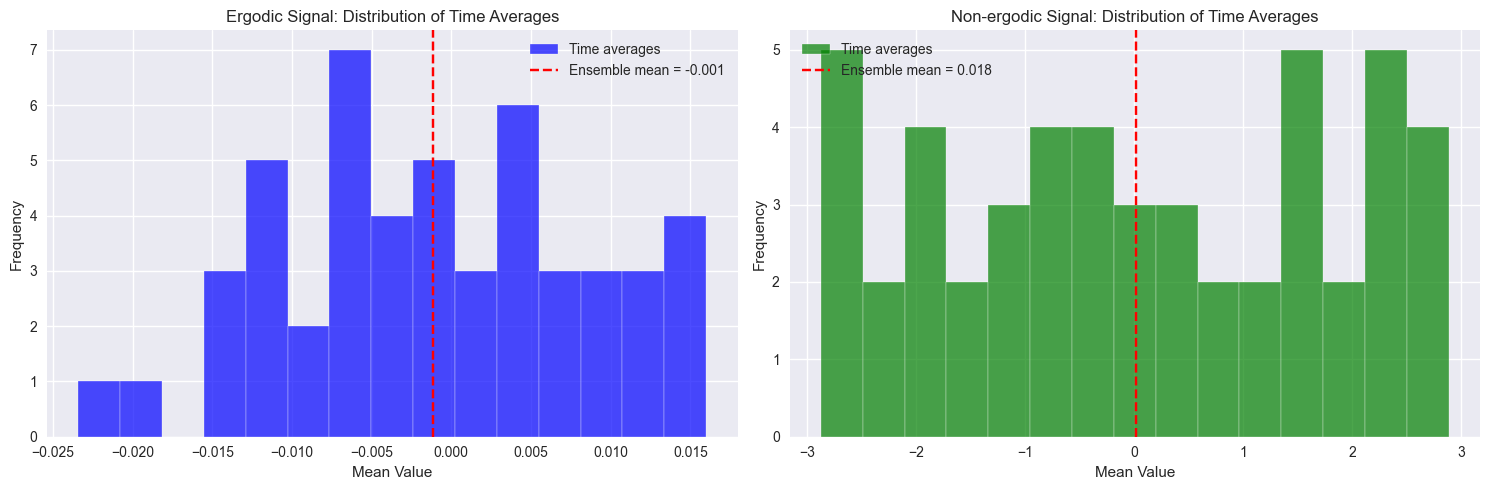

In [29]:
# Ergodicity test: Compare time and ensemble averages
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of time averages for ergodic signal
axes[0].hist(ergodic_time_means, bins=15, alpha=0.7, color='blue', label='Time averages')
axes[0].axvline(ergodic_ensemble_mean_val, color='red', linestyle='--', 
                label=f'Ensemble mean = {ergodic_ensemble_mean_val:.3f}')
axes[0].set_title('Ergodic Signal: Distribution of Time Averages')
axes[0].set_xlabel('Mean Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Histogram of time averages for non-ergodic signal
axes[1].hist(non_ergodic_time_means, bins=15, alpha=0.7, color='green', label='Time averages')
axes[1].axvline(non_ergodic_ensemble_mean_val, color='red', linestyle='--', 
                label=f'Ensemble mean = {non_ergodic_ensemble_mean_val:.3f}')
axes[1].set_title('Non-ergodic Signal: Distribution of Time Averages')
axes[1].set_xlabel('Mean Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Part 6: Power Spectral Density Estimation

Compare PSD estimation using single realization versus multiple realizations to demonstrate the importance of ensemble averaging for reliable spectral analysis.

In [30]:
print("\nPART 6: POWER SPECTRAL DENSITY ESTIMATION")
print("-" * 40)

# Single realization PSD vs Multiple realizations PSD
def estimate_psd_single_vs_multiple(realizations, signal_name):
    """Compare PSD estimation using single vs multiple realizations"""
    
    # Single realization PSD (using first realization)
    f_single, psd_single = welch(realizations[0], fs=fs, nperseg=1024)
    
    # Multiple realizations PSD (average over all realizations)
    psd_multiple = []
    for realization in realizations:
        f, psd = welch(realization, fs=fs, nperseg=1024)
        psd_multiple.append(psd)
    
    psd_multiple = np.array(psd_multiple)
    psd_multiple_mean = np.mean(psd_multiple, axis=0)
    psd_multiple_std = np.std(psd_multiple, axis=0)
    
    return f_single, psd_single, f, psd_multiple_mean, psd_multiple_std

# Estimate PSDs
f_erg_s, psd_erg_s, f_erg_m, psd_erg_m_mean, psd_erg_m_std = estimate_psd_single_vs_multiple(
    ergodic_realizations, "Ergodic")

f_nerg_s, psd_nerg_s, f_nerg_m, psd_nerg_m_mean, psd_nerg_m_std = estimate_psd_single_vs_multiple(
    non_ergodic_realizations, "Non-ergodic")


PART 6: POWER SPECTRAL DENSITY ESTIMATION
----------------------------------------


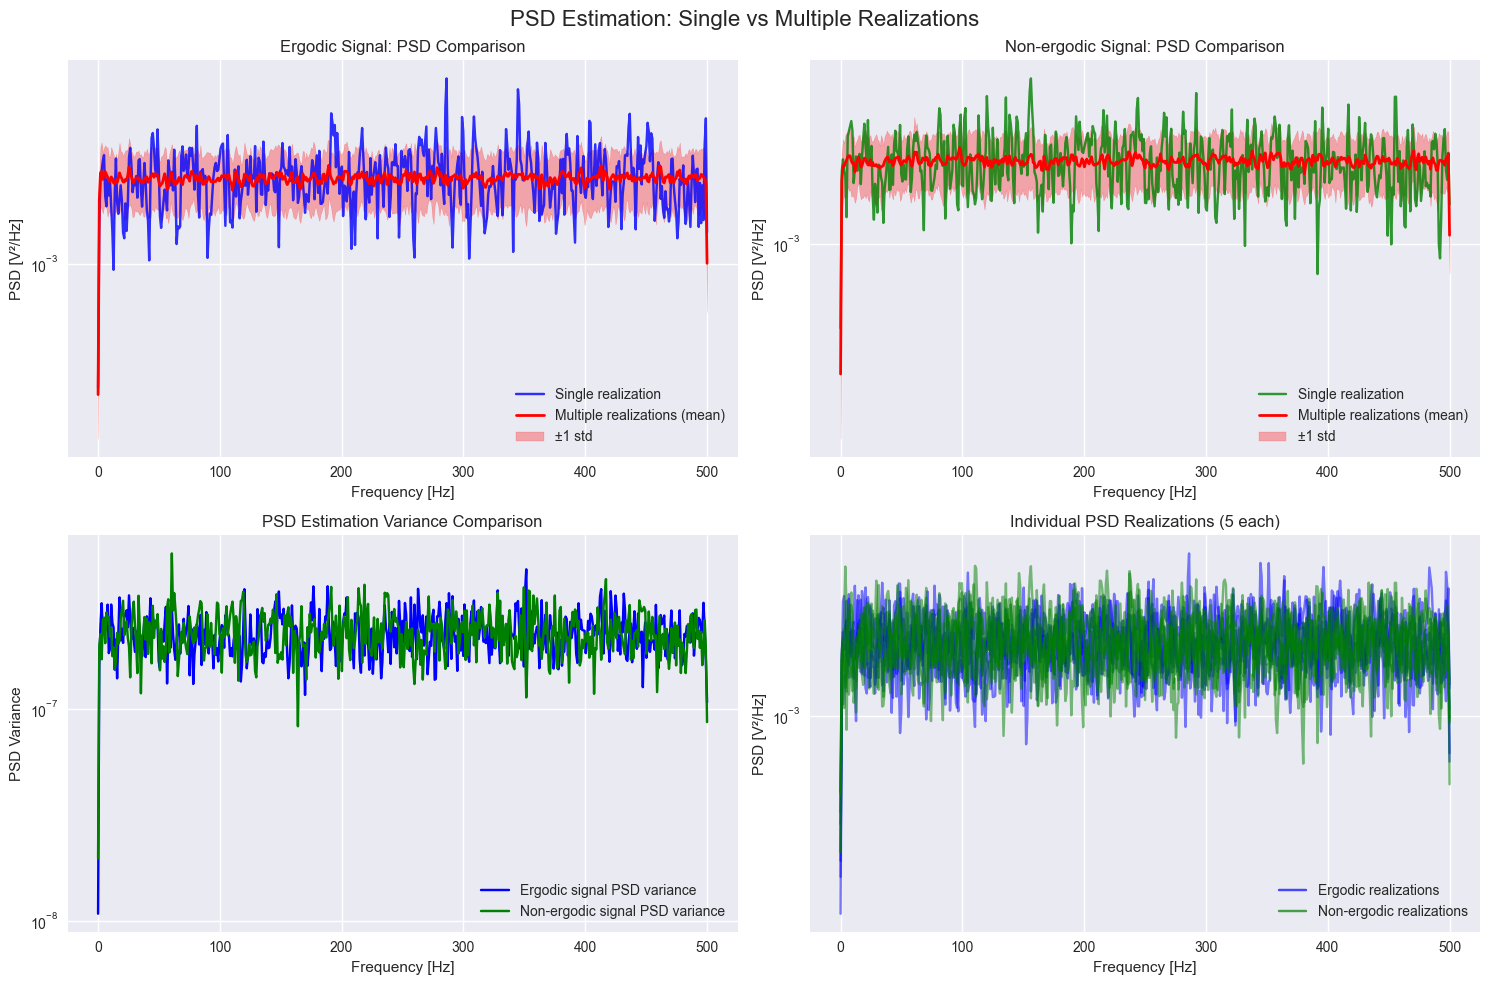

In [31]:
# Plot PSD comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('PSD Estimation: Single vs Multiple Realizations', fontsize=16)

# Ergodic signal PSDs
axes[0, 0].semilogy(f_erg_s, psd_erg_s, 'b-', alpha=0.8, label='Single realization')
axes[0, 0].semilogy(f_erg_m, psd_erg_m_mean, 'r-', linewidth=2, label='Multiple realizations (mean)')
axes[0, 0].fill_between(f_erg_m, psd_erg_m_mean - psd_erg_m_std, 
                        psd_erg_m_mean + psd_erg_m_std, alpha=0.3, color='red', label='±1 std')
axes[0, 0].set_title('Ergodic Signal: PSD Comparison')
axes[0, 0].set_xlabel('Frequency [Hz]')
axes[0, 0].set_ylabel('PSD [V²/Hz]')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Non-ergodic signal PSDs
axes[0, 1].semilogy(f_nerg_s, psd_nerg_s, 'g-', alpha=0.8, label='Single realization')
axes[0, 1].semilogy(f_nerg_m, psd_nerg_m_mean, 'r-', linewidth=2, label='Multiple realizations (mean)')
axes[0, 1].fill_between(f_nerg_m, psd_nerg_m_mean - psd_nerg_m_std, 
                        psd_nerg_m_mean + psd_nerg_m_std, alpha=0.3, color='red', label='±1 std')
axes[0, 1].set_title('Non-ergodic Signal: PSD Comparison')
axes[0, 1].set_xlabel('Frequency [Hz]')
axes[0, 1].set_ylabel('PSD [V²/Hz]')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Variance comparison - recalculate PSD arrays for variance analysis
psd_ergodic_all = np.array([welch(real, fs=fs, nperseg=1024)[1] for real in ergodic_realizations])
psd_non_ergodic_all = np.array([welch(real, fs=fs, nperseg=1024)[1] for real in non_ergodic_realizations])

psd_variance_ergodic = np.var(psd_ergodic_all, axis=0)
psd_variance_non_ergodic = np.var(psd_non_ergodic_all, axis=0)

axes[1, 0].semilogy(f_erg_m, psd_variance_ergodic, 'b-', label='Ergodic signal PSD variance')
axes[1, 0].semilogy(f_nerg_m, psd_variance_non_ergodic, 'g-', label='Non-ergodic signal PSD variance')
axes[1, 0].set_title('PSD Estimation Variance Comparison')
axes[1, 0].set_xlabel('Frequency [Hz]')
axes[1, 0].set_ylabel('PSD Variance')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Show multiple individual PSDs for comparison
for i in range(5):
    f_temp, psd_temp = welch(ergodic_realizations[i], fs=fs, nperseg=1024)
    axes[1, 1].semilogy(f_temp, psd_temp, alpha=0.5, color='blue')

for i in range(5):
    f_temp, psd_temp = welch(non_ergodic_realizations[i], fs=fs, nperseg=1024)
    axes[1, 1].semilogy(f_temp, psd_temp, alpha=0.5, color='green')

axes[1, 1].semilogy([], [], 'b-', alpha=0.7, label='Ergodic realizations')
axes[1, 1].semilogy([], [], 'g-', alpha=0.7, label='Non-ergodic realizations')
axes[1, 1].set_title('Individual PSD Realizations (5 each)')
axes[1, 1].set_xlabel('Frequency [Hz]')
axes[1, 1].set_ylabel('PSD [V²/Hz]')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Part 7: Quantitative Analysis

Calculate metrics to quantify the differences between ergodic and non-ergodic signals.

In [32]:
print("\nPART 7: QUANTITATIVE ANALYSIS")
print("-" * 40)

# Calculate ergodicity measures
def ergodicity_measure(time_averages, ensemble_average):
    """Calculate a simple ergodicity measure"""
    return np.std(time_averages) / abs(ensemble_average) if ensemble_average != 0 else np.std(time_averages)

erg_measure_ergodic = ergodicity_measure(ergodic_time_means, ergodic_ensemble_mean_val)
erg_measure_non_ergodic = ergodicity_measure(non_ergodic_time_means, non_ergodic_ensemble_mean_val)

print(f"Ergodicity measure (lower = more ergodic):")
print(f"  Ergodic signal: {erg_measure_ergodic:.4f}")
print(f"  Non-ergodic signal: {erg_measure_non_ergodic:.4f}")

# PSD consistency analysis
psd_consistency_ergodic = np.mean(psd_erg_m_std / psd_erg_m_mean)
psd_consistency_non_ergodic = np.mean(psd_nerg_m_std / psd_nerg_m_mean)

print(f"\nPSD estimation consistency (coefficient of variation):")
print(f"  Ergodic signal: {psd_consistency_ergodic:.4f}")
print(f"  Non-ergodic signal: {psd_consistency_non_ergodic:.4f}")


PART 7: QUANTITATIVE ANALYSIS
----------------------------------------
Ergodicity measure (lower = more ergodic):
  Ergodic signal: 8.1693
  Non-ergodic signal: 96.5665

PSD estimation consistency (coefficient of variation):
  Ergodic signal: 0.2382
  Non-ergodic signal: 0.2401


## Conclusions

### Ergodicity Analysis:
- **Ergodic signal (WGN)**: Time averages converge to ensemble averages
- **Non-ergodic signal**: Time averages vary significantly between realizations  
- **Ergodic signals** show consistent statistical behavior across realizations

### PSD Estimation Differences:
- **Single realization PSD** can be highly variable
- **Multiple realizations** provide more reliable PSD estimates
- **Ergodic signals**: Single realization can represent ensemble behavior
- **Non-ergodic signals**: Multiple realizations essential for accurate PSD

In [33]:
print("\n" + "=" * 60)
print("CONCLUSIONS")
print("=" * 60)

print("\nERGODICITY ANALYSIS:")
print("- Ergodic signal (WGN): Time averages converge to ensemble averages")
print("- Non-ergodic signal: Time averages vary significantly between realizations")
print("- Ergodic signals show consistent statistical behavior across realizations")

print("\nPSD ESTIMATION DIFFERENCES:")
print("- Single realization PSD can be highly variable")
print("- Multiple realizations provide more reliable PSD estimates")
print("- Ergodic signals: Single realization can represent ensemble behavior")
print("- Non-ergodic signals: Multiple realizations essential for accurate PSD")

print(f"\nKEY METRICS:")
print(f"- Ergodic signal ergodicity measure: {erg_measure_ergodic:.4f}")
print(f"- Non-ergodic signal ergodicity measure: {erg_measure_non_ergodic:.4f}")
print(f"- PSD consistency ratio: {psd_consistency_non_ergodic/psd_consistency_ergodic:.2f}x worse for non-ergodic")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("=" * 60)


CONCLUSIONS

ERGODICITY ANALYSIS:
- Ergodic signal (WGN): Time averages converge to ensemble averages
- Non-ergodic signal: Time averages vary significantly between realizations
- Ergodic signals show consistent statistical behavior across realizations

PSD ESTIMATION DIFFERENCES:
- Single realization PSD can be highly variable
- Multiple realizations provide more reliable PSD estimates
- Ergodic signals: Single realization can represent ensemble behavior
- Non-ergodic signals: Multiple realizations essential for accurate PSD

KEY METRICS:
- Ergodic signal ergodicity measure: 8.1693
- Non-ergodic signal ergodicity measure: 96.5665
- PSD consistency ratio: 1.01x worse for non-ergodic

ANALYSIS COMPLETED SUCCESSFULLY
